# Análise básica dos casos de uso - Estatística descritiva

In [1]:
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as pl
from urllib.parse import urlparse

## Functions

In [4]:
def fillnone(entry, replacement):
    """
    Return `entry` if it is not None. Otherwise, return `replacement`.
    """
    if entry == None:
        return replacement
    else:
        return entry

def extract(usecases, key):
    """
    Given a list of dicts `usecases`, return a list of all properties 
    of the dicts stored under `key`.
    """
    values = [uc[key] for uc in usecases]
    return values

def select(usecases, key, value, exact=True):
    """
    Return a subset of elements in list of dict `usecases` where 
    property stored under `key` has `value`. If `exact` is False,
    select elements whose value (str) has a substring given by
    `value`.
    """
    if exact == True:
        sel = list(filter(lambda uc: uc[key] == value, usecases))
    else:
        sel = list(filter(lambda uc: fillnone(uc[key], '').find(value) != -1, usecases))
    return sel

class translate_dict(dict):
    """
    A dict that returns the key used if no translation was provided for it.
    """
    def __missing__(self,key):
        return key

## Load data

In [45]:
# Lê os dados:
#with open('../dados/backups/usecases_bkp_2025-11-26.json', 'r') as f:
with open('usecases_current.json', 'r') as f:
    data = json.load(f)
usecases_raw = data['data']

In [ ]:
# Seleciona casos considerados de uso de dados públicos:
usecases = list(filter(lambda uc: (uc['status_published'] == True) or ((fillnone(uc['comment'], '').find('Ocultado porque') == -1) and (fillnone(uc['comment'], '').find('não atendem aos nossos critérios') == -1)) , usecases_raw))

# Seleciona casos considerados como não consistentes com nosso critérios de coleta:
not_usecases = list(filter(lambda uc: not ((uc['status_published'] == True) or ((fillnone(uc['comment'], '').find('Ocultado porque') == -1) and (fillnone(uc['comment'], '').find('não atendem aos nossos critérios') == -1))) , usecases_raw))

## Analysis

### Nível de cobertura geográfica

In [7]:
geolevel = extract(usecases, 'geo_level')

Text(0.5, 0, 'Número de casos')

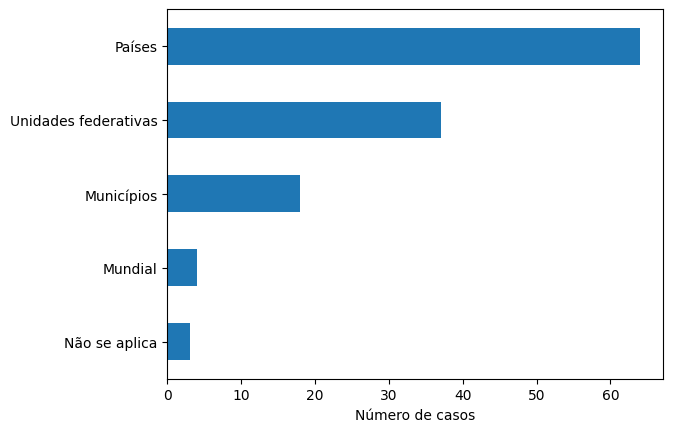

In [49]:
# Número de casos por nível de cobertura geográfica:
pd.Series(geolevel).value_counts(ascending=True).plot(kind='barh')
pl.xlabel('Número de casos')

In [9]:
# Casos "Não se aplica":
extract(select(usecases, 'geo_level', 'Não se aplica'), 'name')

['BERTimbau',
 'Toxic, Hateful, Offensive or Abusive? What Are We Really Classifying? An Empirical Analysis of Hate Speech Datasets',
 'Base dos Dados']

In [10]:
# Casos de cobertura nacional:
extract(select(usecases, 'geo_level', 'Países'), 'name')

['Agenda de Nilmário Miranda tem 1 compromisso a cada 9 dias',
 'Petroleiras aproveitam disputas entre indígenas e ocupam papel de Estado enquanto exploram territórios no Equador',
 'Petróleo gera royalties, mas não desenvolvimento na Amazônia peruana',
 'VIS DATA - Visualizador de Dados Sociais',
 'Cacimbão',
 'Brasil Transparente',
 'Bolsa Família e Cadastro Único no seu município',
 'Indígenas da Amazônia colombiana denunciam poluição por petróleo e ameaças de guerrilhas',
 'ExxonMobil consolida ‘petroestado’ em meio a denúncias ambientais na Guiana',
 'AuditaSocial',
 'Análise dos Dados do ENEM 2023 para Cursos Selecionados — Spark & Power BI',
 'Análise de Leitos Hospitalares e de UTI',
 'AnacDataSearch',
 'Amazônia desponta como nova fronteira global do petróleo',
 'Como a pistola 9mm superou o revólver 38 e a 380 como arma mais popular do Brasil',
 'Entre a fila do SUS e a vida: em cidades sem especialistas, pacientes fazem jornada por atendimento médico',
 'Brasil precisa inten

### Países

In [11]:
countries = extract(usecases, 'countries')

In [12]:
# Número de países abordados pelo caso de uso:
countries_series = pd.Series(countries)
countries_series.str.len().value_counts()

1.0    116
3.0      1
5.0      1
2.0      1
dtype: int64

In [13]:
# Países abordados (lembrando que um caso de uso pode abordar mais de um país):
pais_df = countries_series.explode().value_counts().reset_index().rename({'index': 'pais', 0:'numero_de_casos_cobrindo_o_pais'}, axis=1)
#pais_df.to_csv('../resultados/2025-12_semana-de-dados-BR/dados/num-casos-cobrindo-paises.csv', index=False)
pais_df

,pais,numero_de_casos_cobrindo_o_pais
0,Brasil,116
1,Equador,2
2,Peru,2
3,Colômbia,2
4,Guiana,2
5,Suriname,1
6,Estados Unidos,1


Maioria dos países citados são da Amazônia.

### UFs

In [14]:
ufs = extract(usecases, 'fed_units')

In [15]:
# Quantidade de UFs cobertas pelo caso de uso (0 indica abrangência nacional, mundial ou 'não se aplica'):
uf_series = pd.Series(ufs)
uf_series.str.len().fillna(0).value_counts()

0.0     73
1.0     45
2.0      3
9.0      3
3.0      2
23.0     1
4.0      1
dtype: int64

Text(0, 0.5, 'Número de casos cobrindo cada UF')

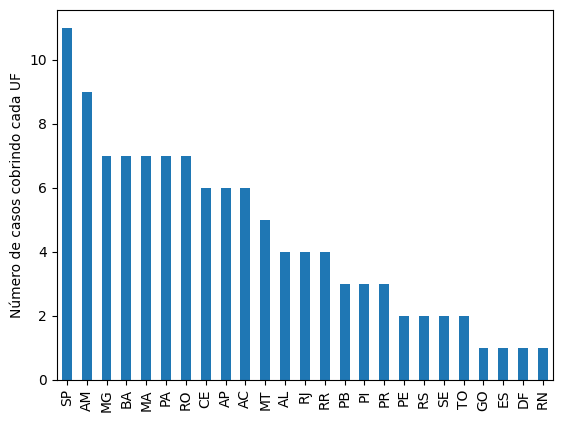

In [50]:
# Dos casos brasileiros com nível inferior ao nacional, as UFs mais citadas:
uf_cases = uf_series.explode().value_counts()
uf_cases.plot(kind='bar')
pl.ylabel('Número de casos cobrindo cada UF')

Muitos casos sobre a amazônia.

In [17]:
# UFs abordadas (lembrando que um caso de uso pode abordar mais de uma UF):
# (as de cobertura nacional, mundial ou 'não se aplica' não aparecem aqui)
uf_cases_df = uf_cases.reset_index().rename({'index': 'uf', 0:'numero_de_casos_cobrindo_a_uf'}, axis=1)
#uf_cases_df.to_csv('../resultados/2025-12_semana-de-dados-BR/dados/num-casos-cobrindo-ufs.csv', index=False)
uf_cases_df

,uf,numero_de_casos_cobrindo_a_uf
0,SP,11
1,AM,9
2,MG,7
3,BA,7
4,MA,7
5,PA,7
6,RO,7
7,CE,6
8,AP,6
9,AC,6


### Temas

In [18]:
temas = extract(usecases, 'topics')
temas_series = pd.Series(temas)
max_n_topics = len(set(temas_series.explode()))

Text(0, 0.5, 'Número de casos')

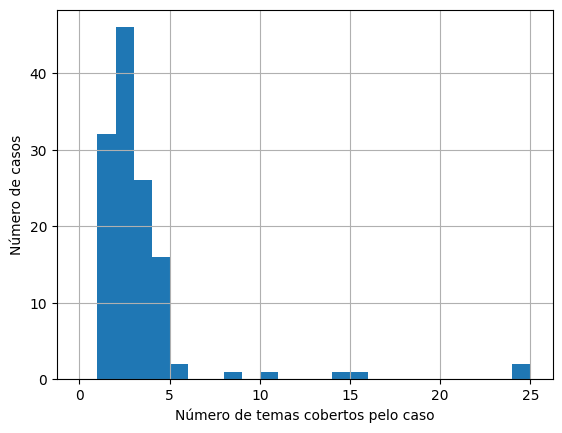

In [51]:
# Número de temas de que tratam os casos:
max_temas = 25
temas_series.str.len().fillna(0).clip(upper=max_temas).hist(bins=np.arange(0, max_temas + 1))
pl.xlabel('Número de temas cobertos pelo caso')
pl.ylabel('Número de casos')

Text(0.5, 0, 'Número de casos cobrindo cada tema')

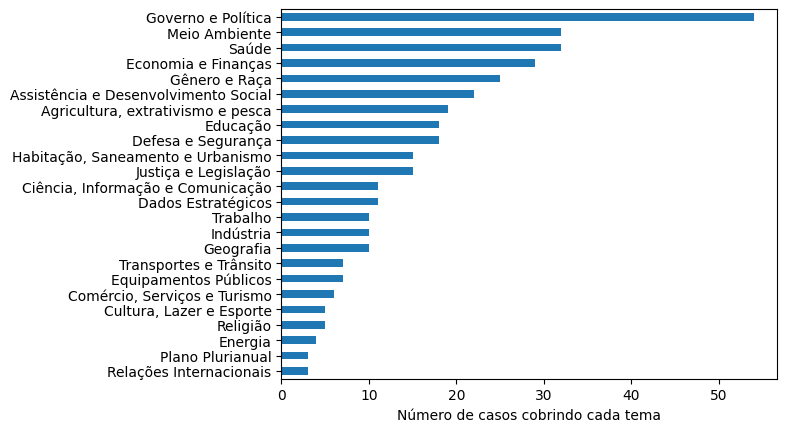

In [52]:
# Temas mais tratados (um caso pode ter mais de um tema):
temas_series.explode().value_counts(ascending=True).plot(kind='barh')
pl.xlabel('Número de casos cobrindo cada tema')

No início do projeto, acho que as categorias foram copiadas da Câmara dos Deputados. Mais tarde, as cetegorias foram alinhadas com as da CGU. Por último, adicionamos dois possíveis temas que estavam fazendo falta: Gênero e Raça e Religião.

#### Criando um grafo de temas que aparecem juntos

In [21]:
# Vamos remover os casos que cobrem todos os temas:
temas_noall = temas_series.loc[temas_series.str.len() < max_n_topics]
# Vamos calcular o tamanho dos nodes (núm de casos que cobrem cada tema):
temas_clusters = temas_noall.explode()
temas_clusters.name = 'node'
node_sizes = temas_clusters.value_counts()

In [22]:
# Cria tabela organizada de pares de temas existentes em cada caso:
cross_temas_df = temas_clusters.reset_index().join(temas_clusters, on='index', how='outer', lsuffix='_1', rsuffix='_2')
cross_temas_df = cross_temas_df.loc[cross_temas_df['node_1'] != cross_temas_df['node_2']]
cross_temas_df["pair"] = cross_temas_df.apply(lambda row: tuple(sorted([row["node_1"], row["node_2"]])), axis=1)
undirected_temas_df = cross_temas_df.drop_duplicates(subset=['index', 'pair'])

# Contabiliza o número de vezes que cada par aparece:
edges_df = undirected_temas_df['pair'].value_counts().reset_index()
edges_df['node_1'] = edges_df['index'].str[0]
edges_df['node_2'] = edges_df['index'].str[1]
edges_df.rename({'pair':'pair_counts'}, axis=1, inplace=True)

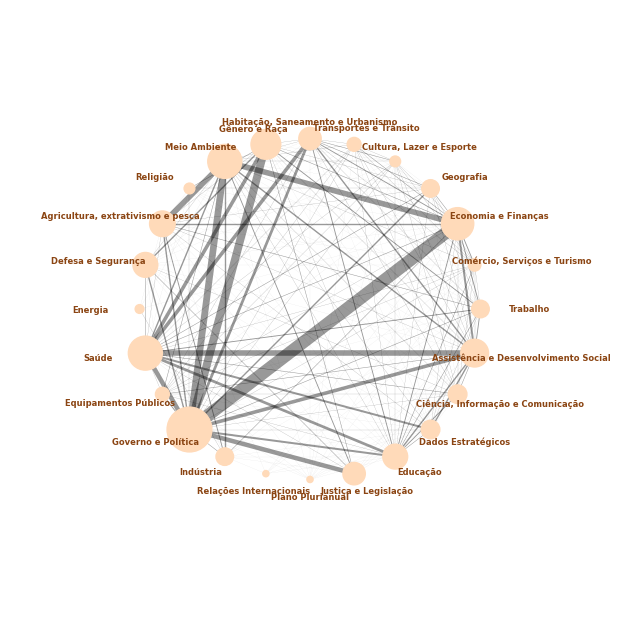

In [43]:
import networkx as nx

# Create an undirected graph
G = nx.Graph()

# Add nodes:
#sorted_node_sizes = pd.concat([node_sizes.iloc[i::4] for i in range(4)])
sorted_node_sizes = node_sizes.sample(len(node_sizes), random_state=1)
G.add_nodes_from(list(sorted_node_sizes.index))

# Add edges with custom weights (we'll map these to thickness)
for i in range(len(edges_df)):
    row = edges_df.iloc[i]
    G.add_edge(row['node_1'], row['node_2'], weight=row['pair_counts']) 

# Define node sizes (in points^2)
node_scale = 20
sizes = [node_sizes[n] * node_scale for n in G.nodes]

# Define edge widths from weights:
edge_scale = 0.20
edge_widths = [(G[u][v]['weight'] * edge_scale)**2 for u, v in G.edges]

# Choose a layout
pos = nx.circular_layout(G)

# Plot graph:
pl.figure(figsize=(6, 6))
edge_colors = [(0, 0, 0, 0.4) for _ in G.edges()]
nx.draw(
    G,
    pos,
    with_labels=False,
    node_size=sizes,
    width=edge_widths,
    node_color="peachpuff",
    edge_color=edge_colors
)

# Add labels (on the side of the nodes):
label_pos = {k: v * np.array([1 + len(v) / 7, 1.1]) for k,v in pos.items()}
nx.draw_networkx_labels(
    G,
    label_pos,
    font_size=6,
    font_color='saddlebrown',
    font_weight='bold'
)

pl.margins(x=0.3, y=0.3)
#pl.savefig('../resultados/2025-12_semana-de-dados-BR/apresentacao/imagens/grafo_temas_juntos_rand-1.png', dpi=300)


## Analise dos datasets

Text(0, 0.5, 'Número de casos')

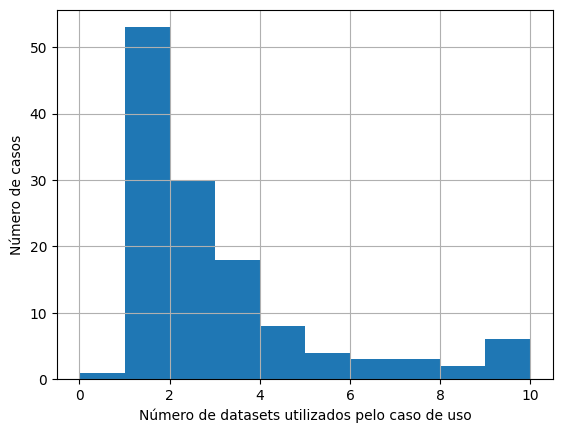

In [53]:
# Número de datasets utilizados:
max_datasets = 10
pd.Series(extract(usecases, 'datasets')).str.len().clip(upper=max_datasets).hist(bins=np.arange(0, max_datasets + 1))
pl.xlabel('Número de datasets utilizados pelo caso de uso')
pl.ylabel('Número de casos')

In [26]:
# Cria uma tabela de datasets utilizados:
ds_list = pd.Series(extract(usecases, 'datasets')).explode().dropna().tolist()
ds_df = pd.DataFrame(ds_list)

In [27]:
# Normalização do nome das instituições, para correta contabilização:
org_names = {'Controladoria-Geral da União (CGU)': 'CGU', 
             'Ministério do Desenvolvimento e Assistência Social, Família e Combate à Fome (MDS)': 'MDS',
             'Ministério do Desenvolvimento e Assistência Social, Família e Combate à Fome': 'MDS',
             'Controladoria-Geral da União': 'CGU', 
             'Instituto Brasileiro de Geografia e Estatística - IBGE': 'IBGE',
             'Agência Nacional de Mineração': 'ANM',
             'Agência Nacional de Energia Elétrica - ANEEL': 'ANEEL',
             'Agência Nacional do Petróleo, Gás Natural e Biocombustíveis': 'ANP', 
             'Universidade Federal Fluminense': 'UFF',
             'Agência Nacional de Aviação Civil - ANAC': 'ANAC',
             'Polícia Federal (PF)': 'PF',
             'Ministério da Educação': 'MEC',
             'Ibama': 'IBAMA', 
             'Comissão de Valores Mobiliários': 'CVM',
             'Ministério da Agricultura e Pecuária (MAPA)': 'MAPA',
             'Conselho Nacional de Justiça': 'CNJ',
             'Banco Central do Brasil': 'BCB',
             'Ministério dos Direitos Humanos e da Cidadania': 'MDH',
             'Ministério de Minas e Energia': 'MME', 
             'Ministério do Trabalho e Emprego': 'MTE',
             'Instituto Brasileiro de Informação em Ciência e Tecnologia (IBICT)': 'IBICT', 
             'Ministério da Ciência, Tecnologia e Inovações': 'MCTI',
             'CNPQ': 'CNPq',
             'Ministério do Meio Ambiente': 'MMA',
             'Ministério do Meio Ambiente e Mudança do Clima': 'MMA',
             'Datasus': 'DataSUS',
            }
org_merger = translate_dict(org_names)

In [28]:
# Instituições listadas (após correções):
ds_df['data_institution'].str.strip().map(org_merger).unique()

array(['Fiquem Sabendo', 'IBGE', 'TSE', 'IBAMA',
       'Secretaria da Segurança Pública e Defesa Social do Estado (SSPDS)',
       'Secretaria da Segurança Pública e Defesa Social do Ceará (SSPDS)',
       'Secretaria da Segurança Pública e Defesa Social do Estado do Ceará (SSPDS/CE)',
       'CGU', 'MDH', 'INEP',
       'Rede Amazônica de Informação Socioambiental Georreferenciada (RAISG)',
       'Instituto Internacional Arayara', 'MMA', 'University of Maryland',
       'Instituto Nacional de Estatística e Informática (INEI)',
       'Portal de Transparencia Económica', 'Perúpetro', 'MDS', 'FUNAI',
       'Estado de minas Gerais', 'Banco Mundial',
       'U.S. Energy Information Administration', 'SkyTruth',
       'Global Forest Watch', 'Bank of Guyana', 'Trading Economics',
       'World Integrated Trade Solution (WITS)', 'Ministério das Cidades',
       'ANM', 'ANEEL', 'ANP', 'UFF', 'MEC', 'Ministério da Saúde', 'ANAC',
       'Global Energy Monitor', 'Banco Central del Ecuador', 

Text(0.5, 0, 'Número de usos feitos de datasets')

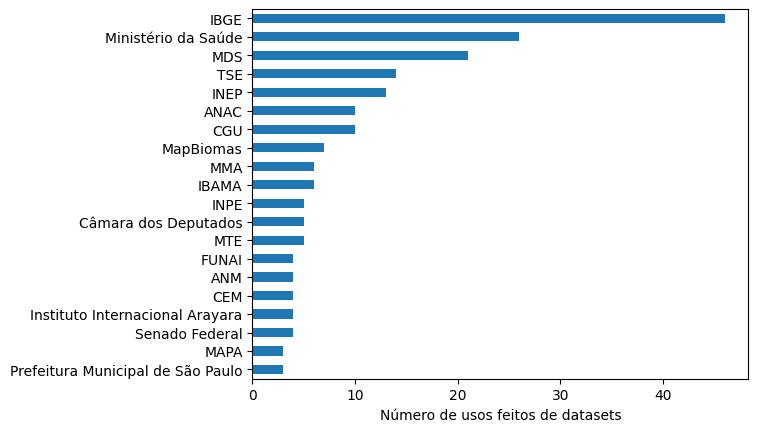

In [54]:
# Número de usos feitos de datasets de cada instituição (cada caso pode utilizar mais de um dataset):
org_data_use = ds_df['data_institution'].str.strip().map(org_merger).value_counts(ascending=True)
org_data_use.tail(20).plot(kind='barh')
pl.xlabel('Número de usos feitos de datasets')

In [30]:
# Tabela com dados referentes ao gráfico acima:
org_data_use_df = org_data_use.reset_index().rename({'index': 'instituicao_publicadora', 'data_institution':'numero_de_usos_de_dados_da_instituicao'}, axis=1)
#org_data_use_df.to_csv('../resultados/2025-12_semana-de-dados-BR/dados/num-uso-de-dados-por-instituicao.csv', index=False)
org_data_use_df

,instituicao_publicadora,numero_de_usos_de_dados_da_instituicao
0,SEADE,1
1,Prefeitura Municipal de Fortaleza,1
2,MME,1
3,Controladoria Geral do Estado do Piauí,1
4,Investe Piauí (Governo do Estado do Piauí),1
...,...,...
126,INEP,13
127,TSE,14
128,MDS,21
129,Ministério da Saúde,26


In [31]:
# Seleção de domínios:
domain = urlparse('http://www.example.test/foo/bar').netloc

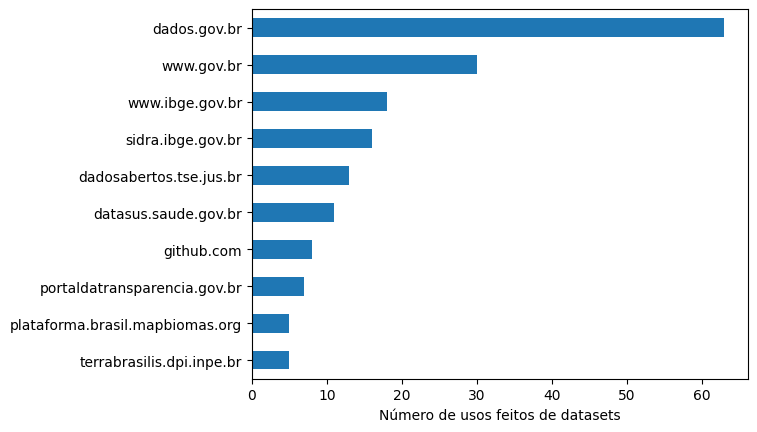

In [55]:
# Número de usos feitos de datasets hospedados em cada domínio (cada caso pode utilizar mais de um dataset):
domain_data_use = ds_df['data_url'].apply(lambda s: urlparse(s).netloc).value_counts(ascending=True)
domain_data_use.tail(10).plot(kind='barh')
pl.xlabel('Número de usos feitos de datasets')
pl.show()

In [33]:
# Tabela com os dados acima:
domain_data_use_df = domain_data_use.reset_index().rename({'index': 'dominio_dos_dados_utilizados', 'data_url':'numero_de_usos_dos_dados_do_dominio'}, axis=1)
#domain_data_use_df.to_csv('../resultados/2025-12_semana-de-dados-BR/dados/num-uso-de-dados-por-dominio.csv', index=False)
domain_data_use_df

,dominio_dos_dados_utilizados,numero_de_usos_dos_dados_do_dominio
0,www.painelsaneamento.org.br,1
1,www.conasems.org.br,1
2,sit.trabalho.gov.br,1
3,dashiptu.centrodametropole.fflch.usp.br,1
4,cidades.ibge.gov.br,1
...,...,...
118,dadosabertos.tse.jus.br,13
119,sidra.ibge.gov.br,16
120,www.ibge.gov.br,18
121,www.gov.br,30


**FAZER: normalizar os linkṣ (mesmo dataset pode ser referenciado por URLs diferentes)**

### Licença dos dados

In [57]:
# Número de usos feitos de datasets com cada licença (cada caso pode utilizar mais de um dataset):
licenca_df = ds_df['data_license'].value_counts().reset_index().rename({'index': 'licenca_dos_dados', 'data_license':'numero_de_usos_sob_a_licenca'}, axis=1)
#licenca_df.to_csv('../resultados/2025-12_semana-de-dados-BR/dados/num-uso-de-dados-por-licenca.csv', index=False)
licenca_df

,licenca_dos_dados,numero_de_usos_sob_a_licenca
0,Inexistente,156
1,CC-BY,91
2,CC BY-ND,32
3,CC BY-SA,13
4,ODbL,11
5,Outra,10
6,CC0,6
7,CC BY-NC-ND,4
8,CC BY-NC,3
9,GPL,1
